In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Define State:

- The "state schema" serves as the input schema for all nodes and edges in the graph.

In [8]:
class State(TypedDict):
    graph_info: str

In [9]:
def which_sport_to_play(state: State) -> State:
    return {"graph_info": state["graph_info"] + "I am going to play..."}

def basketball_game(state: State) -> State:
    return {"graph_info": state["graph_info"] + " basketball."}

def football_game(state: State) -> State:
    return {"graph_info": state["graph_info"] + " football."}

In [17]:
import random
from typing import Literal

'''NOTE: The random sport should output the name of the NODE itself, nothing else. Or else the graph will not work.'''

def random_sport(state: State) -> Literal["basketball", "football"]:
    return random.choice(["basketball", "football"])

## Creating the graph

In [ ]:
graph_builder = StateGraph(State)

# Define nodes
graph_builder.add_node("which_sport_to_play", which_sport_to_play)
graph_builder.add_node("basketball", basketball_game)
graph_builder.add_node("football", football_game)

# Define edges
graph_builder.add_edge(START, "which_sport_to_play")
graph_builder.add_conditional_edges(
    "which_sport_to_play",
    random_sport 
)
graph_builder.add_edge("basketball", END)
graph_builder.add_edge("football", END)

# Compile the graph
graph = graph_builder.compile()

### Displaying the graph

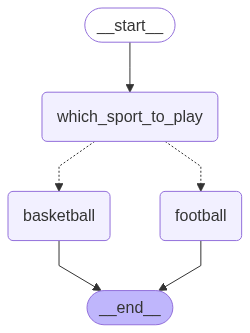

In [15]:
from IPython.display import Image, display

img_data = graph.get_graph().draw_mermaid_png()
display(Image(img_data))

### Invoking the graph

In [22]:
# Run the graph with initial state
result = graph.invoke({"graph_info": "Today, "})
print(result)

{'graph_info': 'Today, I am going to play... football.'}
